In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('train_ctrUa4K.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data = data[:494]
test = data[494:614]

In [5]:
data = data.drop(columns=['Loan_ID'],axis=1)

In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,494.000000,494.000000,476.000000,480.000000,454.000000
mean,5513.149798,1500.224534,144.268908,343.625000,0.845815
std,6551.331018,2141.047557,82.720144,61.274639,0.361524
min,150.000000,0.000000,17.000000,36.000000,0.000000
25%,2873.500000,0.000000,100.000000,360.000000,1.000000
50%,3858.500000,1105.500000,127.000000,360.000000,1.000000
75%,5800.000000,2252.250000,162.000000,360.000000,1.000000
max,81000.000000,20000.000000,700.000000,480.000000,1.000000


In [7]:
# Checking for na 
data.isnull().sum()

Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       40
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# Checking for duplicates
print(data.duplicated().sum())

#If there is duplicates we can drop then using this condition can be used in test data.

if data.duplicated().sum() > 0:
    data = data.drop_duplicates()
    print('Duplicates : ',data.duplicated().sum())

0


In [9]:
data = pd.get_dummies(data,drop_first=True)

In [10]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


Filling na values with mean, median and mode based on datatype and skewness 

In [11]:
for col in data.columns:
    if data[col].dtype == 'O' and data[col].isna().sum() > 0 :
        data[col] = data[col].fillna(value=data[col].mode())
    elif data[col].dtype != 'O' or data[col].skew() >= -0.5 and data[col].skew() <= 0.5:
        data[col] = data[col].fillna(value=data[col].mean())
    elif data[col].dtype != 'O' or data[col].skew() < -0.5 and data[col].skew() > 0.5:   
        data[col] = data[col].fillna(value=data[col].median())

In [12]:
data.isna().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
dtype: int64

Cheking for data imbalance

In [13]:
data['Loan_Status_Y'].value_counts()

1    341
0    153
Name: Loan_Status_Y, dtype: int64

In [14]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [15]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [16]:
X_train_res, y_train_res = sm.fit_resample(X, y)
print(X_train_res.shape, y_train_res.shape)

(682, 14) (682,)


In [17]:
# Checking for multicollinearity

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [19]:
calc_vif(X_train_res)

,variables,VIF
0,ApplicantIncome,2.990771
1,CoapplicantIncome,1.871052
2,LoanAmount,7.978653
3,Loan_Amount_Term,9.627140
4,Credit_History,5.223727
5,Gender_Male,4.366411
6,Married_Yes,3.039122
7,Dependents_1,1.311137
8,Dependents_2,1.323411
9,Dependents_3+,1.216764


In [20]:
X_train_res = X_train_res.drop(columns=['Loan_Amount_Term'],axis=1)

In [21]:
calc_vif(X_train_res)

,variables,VIF
0,ApplicantIncome,2.967431
1,CoapplicantIncome,1.869573
2,LoanAmount,6.487822
3,Credit_History,3.822306
4,Gender_Male,4.059819
5,Married_Yes,3.028475
6,Dependents_1,1.303874
7,Dependents_2,1.319705
8,Dependents_3+,1.203130
9,Education_Not Graduate,1.261343


In [22]:
X_train_res = X_train_res.drop(columns=['LoanAmount'],axis=1)

In [23]:
calc_vif(X_train_res)

,variables,VIF
0,ApplicantIncome,1.734763
1,CoapplicantIncome,1.611892
2,Credit_History,3.414579
3,Gender_Male,3.873938
4,Married_Yes,3.023579
5,Dependents_1,1.301422
6,Dependents_2,1.319134
7,Dependents_3+,1.196873
8,Education_Not Graduate,1.261317
9,Self_Employed_Yes,1.166084


In [24]:
data = X_train_res.join(y_train_res)
data.shape

(682, 13)

In [25]:
new_X = data.iloc[:,:-1]
new_y = data.iloc[:,-1]

In [26]:
print(new_X.shape,new_y.shape)

(682, 12) (682,)


Decision Tree Model

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [28]:
X_train , X_test, y_train , y_test = train_test_split(new_X,new_y,train_size=0.7)

In [29]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
model.score(X_train,y_train)

0.9979035639412998

In [31]:
model.score(X_test,y_test)

0.7560975609756098

In [32]:
y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
print('Model accuracy score : ',accuracy_score(y_test, y_pred))

Model accuracy score :  0.7560975609756098


<AxesSubplot:>

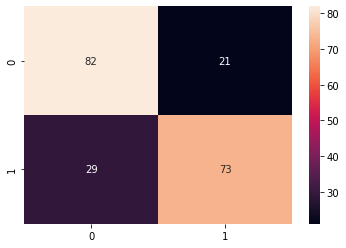

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2,3, 4, 5, 7, 9, 10, 15, 20],
    'min_samples_leaf': [3,4, 5, 6 ,7 ,10,15, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [37]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=model, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [38]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Wall time: 3.8 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 7, 9, 10, 15, 20],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 10, 15, 20, 50,
                                              100]},
             scoring='accuracy', verbose=1)

In [39]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=10)

In [40]:
dtc = DecisionTreeClassifier(max_depth=12, min_samples_leaf=9)
dtc.fit(X_train,y_train)
dtc.score(X_test,y_test)

0.7804878048780488

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [42]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [43]:
evaluate_model(dtc)

Train Accuracy : 0.8406708595387841
Train Confusion Matrix:
[[195  43]
 [ 33 206]]
--------------------------------------------------
Test Accuracy : 0.7804878048780488
Test Confusion Matrix:
[[78 25]
 [20 82]]


RandomForestClassifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
rf_model.score(X_train,y_train)

0.9979035639412998

In [46]:
rf_model.score(X_test,y_test)

0.7609756097560976

In [47]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [48]:
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [49]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=40, max_features='sqrt', min_samples_split=10,
                       n_estimators=1200)

In [50]:
rf_model = RandomForestClassifier(max_depth=30, min_samples_leaf=1, min_samples_split=2,n_estimators=1300)
rf_model.fit(X_train,y_train)
rf_model.score(X_train,y_train)

0.9979035639412998

In [51]:
rf_model.score(X_test,y_test)

0.7804878048780488

In [53]:
evaluate_model(rf_model)

Train Accuracy : 0.9979035639412998
Train Confusion Matrix:
[[237   1]
 [  0 239]]
--------------------------------------------------
Test Accuracy : 0.7804878048780488
Test Confusion Matrix:
[[79 24]
 [21 81]]


In [191]:
test_dataset = pd.read_csv('C:/Data/loan_pred_test.csv')
test_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


Doing all data preprocessing steps done on train data

In [318]:
test_data = test_dataset.drop(columns=['Loan_ID'],axis=1)

In [319]:
test_data = pd.get_dummies(test_data,drop_first=True)

In [320]:
for col in test_data.columns:
    if test_data[col].dtype == 'O' and test_data[col].isna().sum() > 0 :
        test_data[col] = test_data[col].fillna(value=test_data[col].mode())
    elif test_data[col].dtype != 'O' or data[col].skew() >= -0.5 and test_data[col].skew() <= 0.5:
        test_data[col] = test_data[col].fillna(value=test_data[col].mean())
    elif test_data[col].dtype != 'O' or data[col].skew() < -0.5 and test_data[col].skew() > 0.5:   
        test_data[col] = test_data[col].fillna(value=test_data[col].median())

In [321]:
test_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.000000,1,1,0,0,0,0,0,0,1
1,3076,1500,126.0,360.0,1.000000,1,1,1,0,0,0,0,0,1
2,5000,1800,208.0,360.0,1.000000,1,1,0,1,0,0,0,0,1
3,2340,2546,100.0,360.0,0.825444,1,1,0,1,0,0,0,0,1
4,3276,0,78.0,360.0,1.000000,1,0,0,0,0,1,0,0,1


In [331]:
test_data = test_data.drop(['LoanAmount','Loan_Amount_Term'],axis=1)

In [332]:
dtc_ypred = dtc.predict(test_data)

In [333]:
Loan_Status = []
for i in dtc_ypred:
    if i == 1:
        Loan_Status.append('Y')
    else:
        Loan_Status.append('N')

In [334]:
submit = pd.DataFrame(test_dataset['Loan_ID']).join(pd.DataFrame(Loan_Status))

In [335]:
submit.head()

,Loan_ID,0
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,Y


In [336]:
submit.rename(columns = {0:'Loan_Status'}, inplace = True)

In [337]:
submit.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,Y


In [338]:
submit.shape

(367, 2)

In [330]:
submit.to_csv('final_loan_pred.csv',index=False)